# Pytorch Workflow

What is covered:

1. Data (prepare and Load)
2. Build model
3. Training Model
4. Making Predication and evaluting a model
5. Saving and Loading a model
6. Putting it all together

![IMG](https://camo.githubusercontent.com/4b240bd39906eea1450c488770a94164bb43cf4384d9eb9608b24a4121c616ef/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f7079746f7263682d646565702d6c6561726e696e672f6d61696e2f696d616765732f30315f615f7079746f7263685f776f726b666c6f772e706e67)


In [25]:
import torch
from torch import nn  # nn is the basic building blocks for graphs
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

# Refer to https://pytorch.org/docs/stable/nn.html

'2.0.1+cu118'

### 1. Data (preparing and Loading)

Data can be almost anything... in machine Learning.

- Excel Spreadsheet
- Images of any kind
- Videos
- Audio like songs or Podcast
- DNA
- Text, and many more...

Machine Learning is a game of two parts:

1. Get Daa into numerical representation
2. Build a model to learn patterns in that numerical representation.

![IMG](https://camo.githubusercontent.com/b1b127ac73750d438e02779cb2e2215a3033af06777ba2d8996bb643de34b276/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f7079746f7263682d646565702d6c6561726e696e672f6d61696e2f696d616765732f30312d6d616368696e652d6c6561726e696e672d612d67616d652d6f662d74776f2d70617274732e706e67)


To showcase this, let's create some _known_ data using the linear regression formula (**y = mx + c**)


In [26]:
# Create *known* parameters
weight = 0.7
bias = 0.3
# bias is C and weight is M in y = Mx + C

# create
start = 0
end = 1
step = 0.02

# X is input
X = torch.arange(start, end, step).unsqueeze(dim=1)

# y is output
y = weight * X + bias

y.shape

torch.Size([50, 1])

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

| **Split**          | **Purpose**                                                                                                                  | **Amount of Data Used** | **How Often it is used** |
| ------------------ | ---------------------------------------------------------------------------------------------------------------------------- | ----------------------- | ------------------------ |
| **Training Set**   | The model learns from this data (like the course materials you study during the semester).                                   | ~60-80%                 | Always                   |
| **Validation Set** | The model gets tuned on this data (like the practice exam you take before the final exam).                                   | ~10-20%                 | Often but not always     |
| **Testing Test**   | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20%                 | Always                   |


In [27]:
# Create a train/test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [28]:
# Visualizing Data

def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predications")

    plt.legend(prop={"size": 14})


# Refer to https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

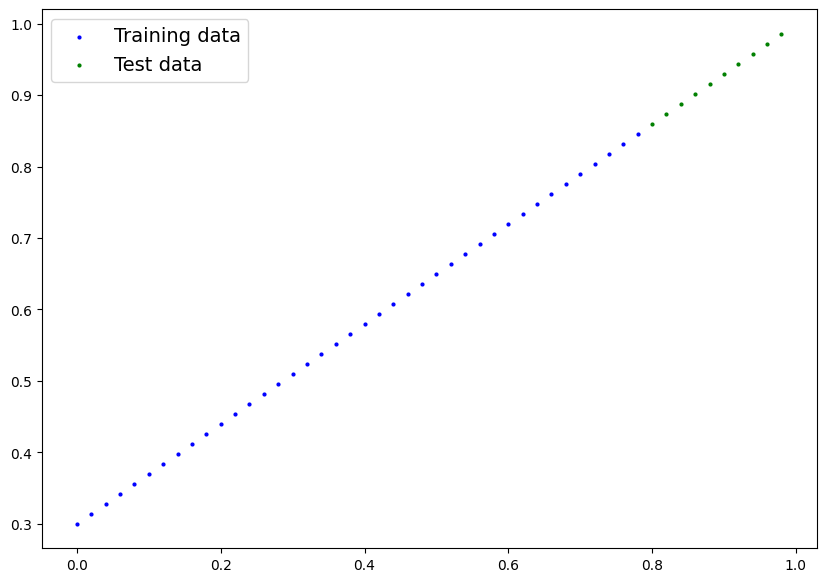

In [29]:
plot_predictions()

## 2. Build Model

My first pytorch model

What the model does:

- Start with random values (weight & bias)
- Look at training data and adjust the random values to better represent (to get closer to) the ideal values (the weight and bias, used to create data)

How does it do so?
Through two main algorithms:

1. Gradient descent
2. Backpropagation


In [30]:
# create a linear regression model class

# Refer to https://realpython.com/python3-object-oriented-programming/
# <- Almost everything in Pytorch is imported from nn.Module (Base class for all neural network models)
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,  # <- Default True
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

## Pytorch Model Buidling Essentials

- `torch.nn` - contains all the building blocks for computational graphs (_a neural network can be considered computational graph_)
- `torch.nn.Parameter` - what parameters should our model try and learn, often a Pytorch layer from `torch.nn` will set these for UserWarning
- `torch.nn.Module` - Th base class for all neural metwork modules, if you subclass it, you can overwrite `forward()`
- `torch.optim` - this where the optimizers in PyTorch livem they will help in gradient descent
- `def forward()` - All `nn.Module` subclasses requires you to overwrite `forward()`, this method defines what happens in the forward computation


In [31]:
# create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [32]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predicitions using `torch.inference_mode()`

To check our model's predicitive power, let's see how well it predicts `y_test` based on `X_test`
When we pass data through our model, it's going to run it through the `forward()` method


In [33]:
with torch.inference_mode(): # <- Turns off the gradient tracking
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

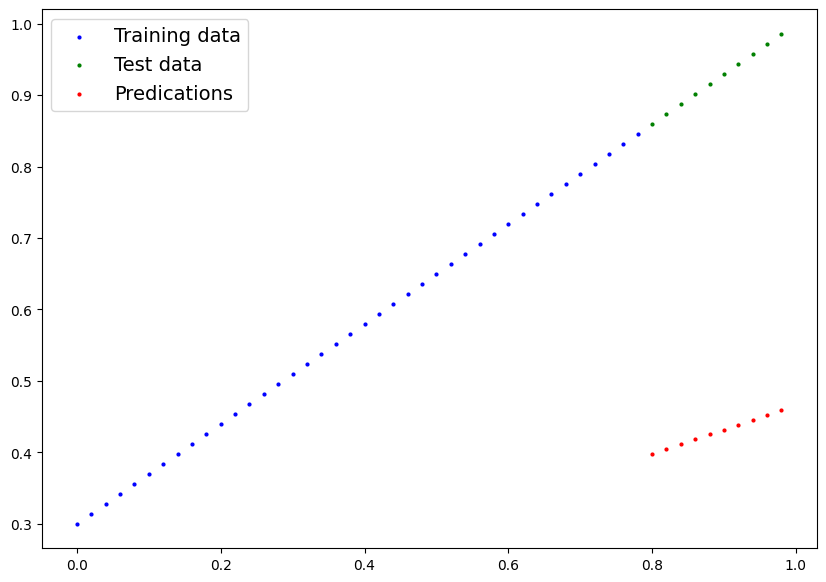

In [34]:
plot_predictions(predictions=y_preds)

## 3. Train Model
The whole idea of training for a model to move from some *unknown* parameters (these may be random) to some *known* parameters

Or in other words from a poor representation of the data to a better representatation of the data

one way to measure the poor representations is by using *Loss Functions*

*Refer to [Loss functions or cost functions](https://pytorch.org/docs/stable/nn.html#loss-functions)*

Things we need to train:
* **Loss Functions:** A function to measure how wrong your model's predictions are to the ideal outputs, *(Lower is better)*
* **Optimizer:** Takes into account the loss of the model and adjusts the model's parameters (eg. weight & bias) to improve the loss function

And specifically for PyTorch, we need:
* A training loop
* A Testing loop

In [35]:
model_0.parameters()

<generator object Module.parameters at 0x7f529ac9c040>

In [36]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [37]:
# Setup a loss functions
loss_fn = nn.L1Loss()

# setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr <- learning rate

### Building a training and testing loop

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (*this involves data moving through our model(s) `forward()` function*) to make predictions on data - also called forward propagation
2. Calculate the loss (*Compare forward pass predictions to ground truth labels*)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**) (***Gradient -> Slope or m***)

In [38]:
# An epoch is one loop through the data
epochs = 168 # <- The lowest loss in 1000 epochs

class Data:
    loss_record = []
    input_record = []
    y_pred_record = []
    def __init__(self, name:str, d:float) -> None:
        
        self.name = name
        self.d = d

        if self.name == "loss":
            Data.loss_record.append(self.d)
        elif self.name == "input":
            Data.input_record.append(self.d)
        else:
            Data.y_pred_record.append(self.d)

### Training
# Step 0 -> Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in Pytorch set all parameters that require gradients to require gradient

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    # print(f"Loss -> {loss}")
    # Refer to https://pytorch.org/docs/stable/nn.html#loss-functions

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropgation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() 

    model_0.eval() # Turns off settings in the model not needed for evaluations/testing
    with torch.inference_mode(): # <- turns off gradient tracking and couple of more things
        # 1. Do forward pass
        test_pred = model_0(X_test)
        Data(name="test", d=test_pred)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # print(model_0.state_dict())
    Data(name="loss", d=loss.item())
    Data(name="input", d=epoch)

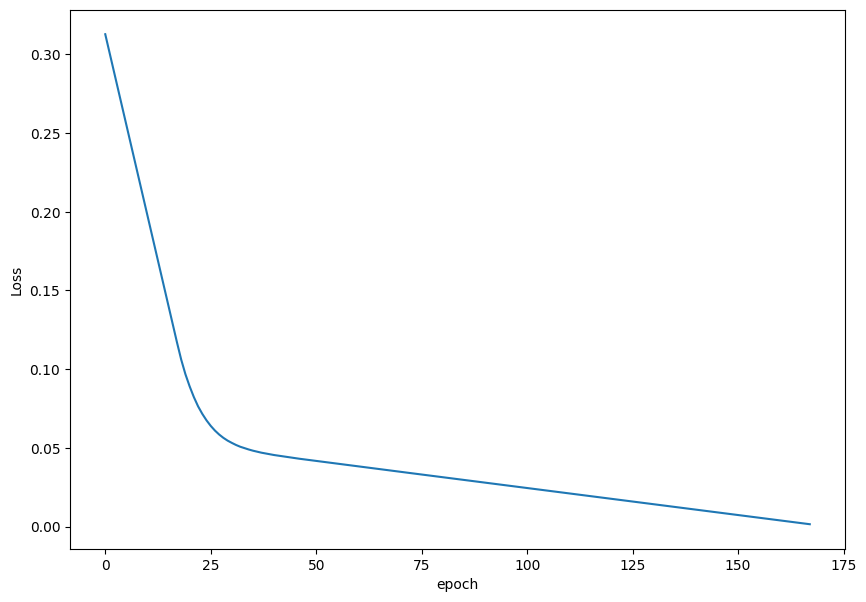

In [39]:
# Generating Graph for loss function
plt.figure(figsize=(10, 7))
plt.plot(Data.input_record, Data.loss_record)
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.show()

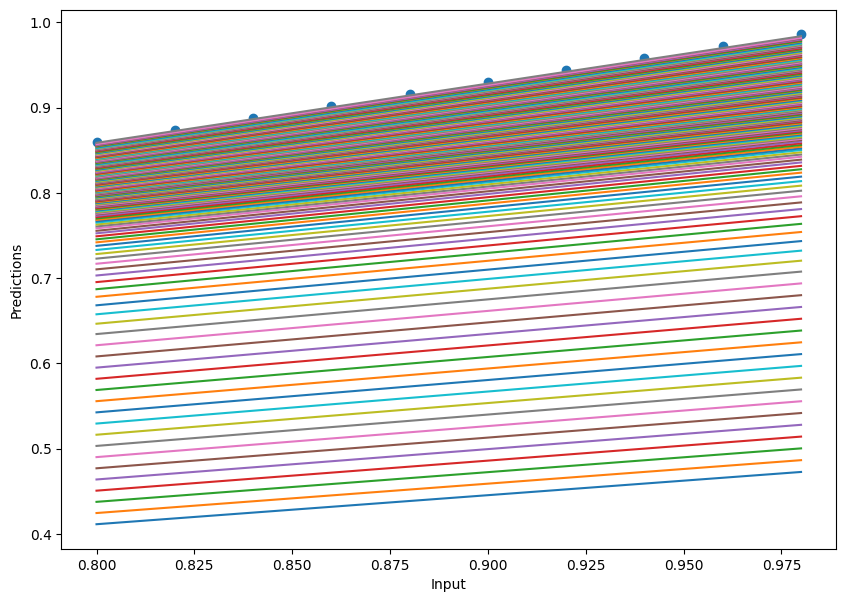

In [40]:
# Generate graph for model predictions

plt.figure(figsize=(10, 7))

for _y_pred in Data.y_pred_record:
    plt.plot(X_test, _y_pred)

# IDEAL PREDICTIONS:
plt.scatter(X_test, y_test)

plt.xlabel("Input")
plt.ylabel("Predictions")

plt.show()

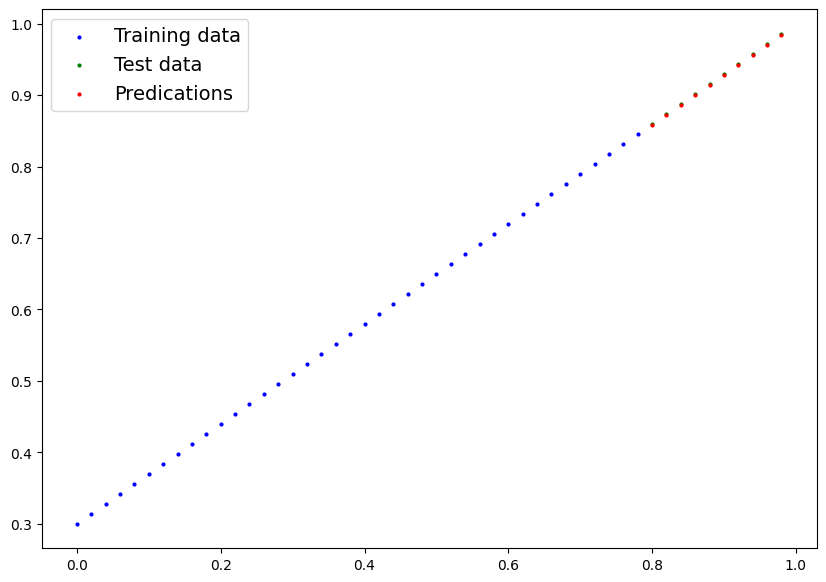

In [41]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

# Plot graph
plot_predictions(predictions=y_pred_new)

In [42]:
print(f"TRAINED -> {model_0.state_dict()}")
print(f"ORIGINAL -> {weight, bias}")

TRAINED -> OrderedDict([('weights', tensor([0.6947])), ('bias', tensor([0.3028]))])
ORIGINAL -> (0.7, 0.3)


#### Finding the best epoch, This test was run on 1000 Epochs

```python
loss_record_numpy = np.array(Data.loss_record)
loss_record_tensor = torch.from_numpy(loss_record_numpy)
print(f"Min Value -> {loss_record_tensor.min()}")
argmin = loss_record_tensor.argmin()

print(f"epoch Value -> {Data.input_record[argmin]}")
```

Output 
```bash
Min Value -> 0.0011887758737429976
epoch Value -> 168
```

## Saving a model in Pytorch

There are three main methods you should know about for saving and loading models in PyTorch:

* `torch.save()` - allows you to save a Pytorch object in Python's pickle format
* `torch.load()` - allows you to load a saved Pytorch Object
* `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

*Refer to [Pytorch Documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html)*

In [43]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME  = "01_pytorch_workflow_model_0.pth" # <- Common convention to use `.pth` or `.pt` for Pytorch model extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict (Recomended)
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

## Loading a Pytorch Model

since we saved our model `state_dict()` rather entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [44]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)

print(f"Unloaded -> {loaded_model_0.state_dict()}")

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(f"Loaded -> {loaded_model_0.state_dict()}")

Unloaded -> OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])
Loaded -> OrderedDict([('weights', tensor([0.6947])), ('bias', tensor([0.3028]))])


In [45]:
# Making some predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8586],
        [0.8725],
        [0.8864],
        [0.9003],
        [0.9142],
        [0.9281],
        [0.9420],
        [0.9559],
        [0.9698],
        [0.9837]])

In [46]:
# Comparing loaded model preds with original model preds

loaded_model_preds == y_pred_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])